In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, MultiPoint

In [3]:
geographic = pd.read_csv('/home/shade/DS4A/Data/Dataset/Dataset/geographic.csv')
ny_shp = gpd.read_file("/home/shade/DS4A/Data/Dataset/Shapes/nta_map.shp")
ny_shp_dissolve = gpd.read_file("/home/shade/DS4A/Data/Dataset/Shapes/Dissolve.shp")

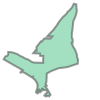

In [7]:
ny_shp.loc[179,'geometry']

In [7]:
df = pd.DataFrame(geographic.columns.sort_values())

In [8]:
df[0].sort_values().equals(ny_shp['ntacode'].sort_values().reset_index(drop=True))

True

In [9]:
green_taxi = pd.read_csv('/home/shade/DS4A/Data/Dataset/Dataset/green_trips.csv')

In [10]:
green_taxi.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5


In [11]:
green_taxi_Points =[Point(x, y) for x, y in zip(green_taxi['pickup_longitude'], green_taxi['pickup_latitude'])]
geo_green_taxi = gpd.GeoDataFrame(green_taxi, geometry=green_taxi_Points)

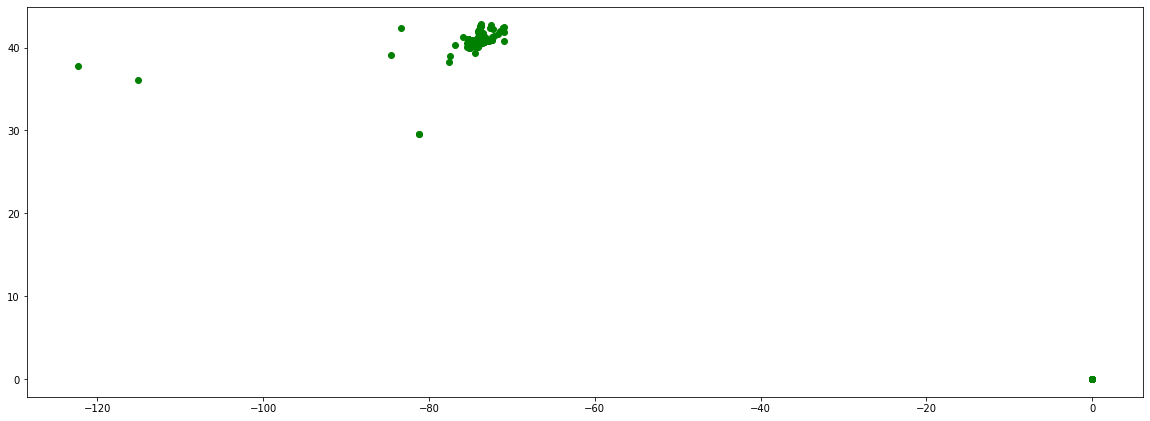

In [12]:
fig, ax = plt.subplots(figsize = (20,16))
ny_shp.plot(figsize=(20,16), alpha=0.1, edgecolor='k', ax=ax)
geo_green_taxi.plot(figsize=(20,16), edgecolor='green', color='green', ax=ax)

In [22]:
bounds = ny_shp.loc[0,'geometry'].bounds
bounds = ny_shp.geometry.total_bounds
df_filtered = geo_green_taxi.dropna()

print(bounds)

df_filtered = df_filtered[df_filtered['pickup_longitude'] > bounds[0]]
df_filtered = df_filtered[df_filtered['pickup_longitude'] < bounds[2]]
df_filtered = df_filtered[df_filtered['pickup_latitude'] > bounds[1]]
df_filtered = df_filtered[df_filtered['pickup_latitude'] < bounds[3]]

print(geo_green_taxi.shape[0] - df_filtered.shape[0])

[-74.25559136  40.4961154  -73.70000906  40.91553278]
6878


In [20]:
df_filtered.shape

(3582170, 10)

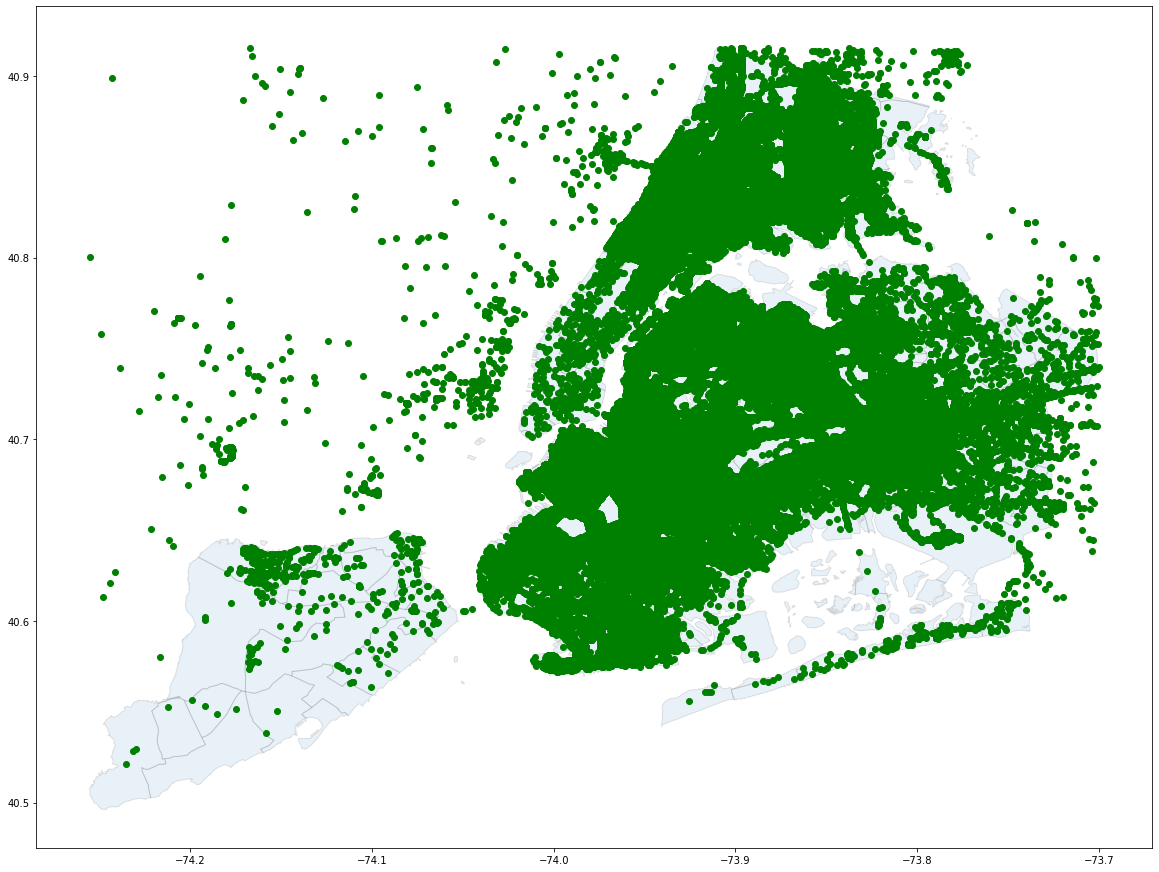

In [23]:
fig, ax = plt.subplots(figsize = (20,16))
ny_shp.plot(figsize=(20,16), alpha=0.1, edgecolor='k', ax=ax)
df_filtered.plot(figsize=(20,16), edgecolor='green', color='green', ax=ax)